In [1]:
import torch
from torch import nn
import numpy as np

import librosa
import librosa.display

import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import os

# 데이터 준비

In [2]:
!git clone https://github.com/siddiquelatif/URDU-Dataset.git

Cloning into 'URDU-Dataset'...
remote: Enumerating objects: 442, done.
remote: Total 442 (delta 0), reused 0 (delta 0), pack-reused 442
Receiving objects: 100% (442/442), 72.05 MiB | 27.41 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [3]:
labels = {
    'Angry':0,
    'Happy':1,
    'Neutral':2,
    'Sad':3
}

In [4]:
os.path.basename('/root/asdf/qwer/ttt.json')

'ttt.json'

In [5]:
data = []
for root, dirs, filenames in os.walk('URDU-Dataset'):
    #ex) base = 'Angry'
    base = os.path.basename(root)
    if base not in labels:
        continue
    label = labels[base] #ex) label = 0
    for filename in filenames:
        first, last = os.path.splitext(filename)
        if last != '.wav':
            continue
        path = os.path.join(root, filename)
        data.append((path, label))

In [6]:
data

[('URDU-Dataset/Neutral/SM5_F33_N061.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F10_N038.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F48_N076.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F63_N091.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F36_N064.wav', 2),
 ('URDU-Dataset/Neutral/SM21_F3_N017.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F64_N092.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F16_N044.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F60_N088.wav', 2),
 ('URDU-Dataset/Neutral/SM20_F4_N08.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F43_N071.wav', 2),
 ('URDU-Dataset/Neutral/SM20_F6_N010.wav', 2),
 ('URDU-Dataset/Neutral/SF9_F4_N04.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F11_N039.wav', 2),
 ('URDU-Dataset/Neutral/SM3_F5_N025.wav', 2),
 ('URDU-Dataset/Neutral/SM3_F3_N023.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F56_N084.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F72_N0100.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F68_N096.wav', 2),
 ('URDU-Dataset/Neutral/SM3_F6_N026.wav', 2),
 ('URDU-Dataset/Neutral/SM5_F54_N082.wav', 2),
 ('URDU-Dataset/Ne

In [7]:
n_mfcc = 13
batch_size = 16
sr = 11025
duration = 3
max_len = int(sr * duration)

# 음성 데이터 불러오기

In [8]:
data[190]

('URDU-Dataset/Sad/SM25_F38_S088.wav', 3)

In [10]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.4 MB/s eta 0:00:00


In [11]:
Xf, sample_ratef = librosa.load(data[190][0], sr=sr)

In [12]:
sample_ratef

11025

In [13]:
len(Xf)

33114

In [14]:
ipd.Audio(Xf, rate=sr)

In [15]:
t = np.linspace(0,1,8000) #예제 싸인 주파수
a = np.sin(t * 2 * np.pi * 400)
ipd.Audio(a, rate = 8000)

In [16]:
t = np.linspace(0, 1, sr)
1000
x = 0.5 * np.sin(t * np.pi * 2 * 1000)
x += 0.3 * np.sin(t * np.pi * 2 * 2000)
x += 0.2 * np.sin(t * np.pi * 2 * 500)
ipd.Audio(x, rate=sr / 2)

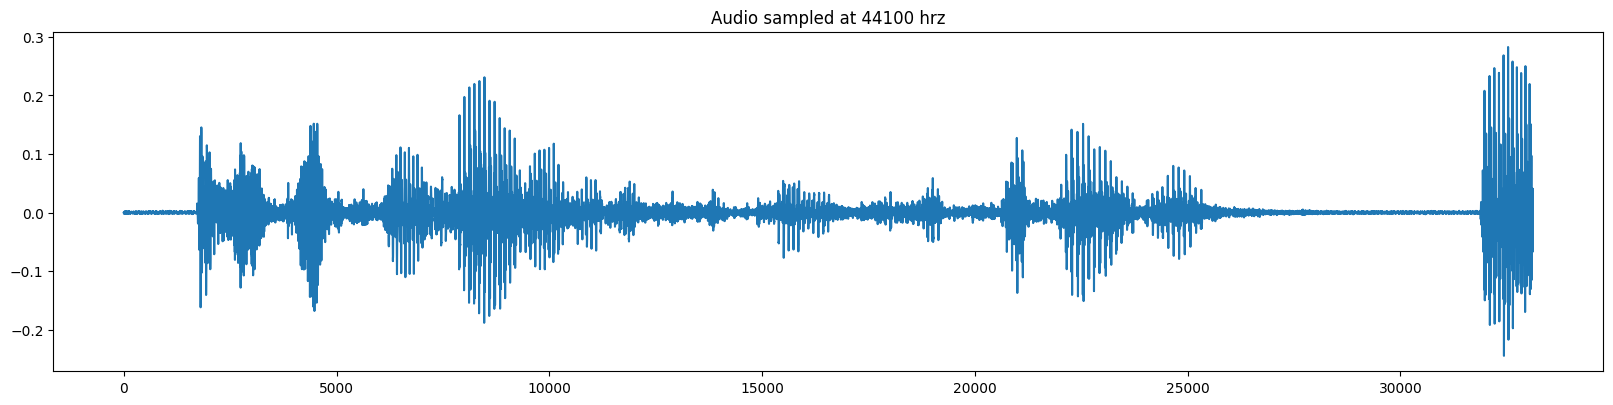

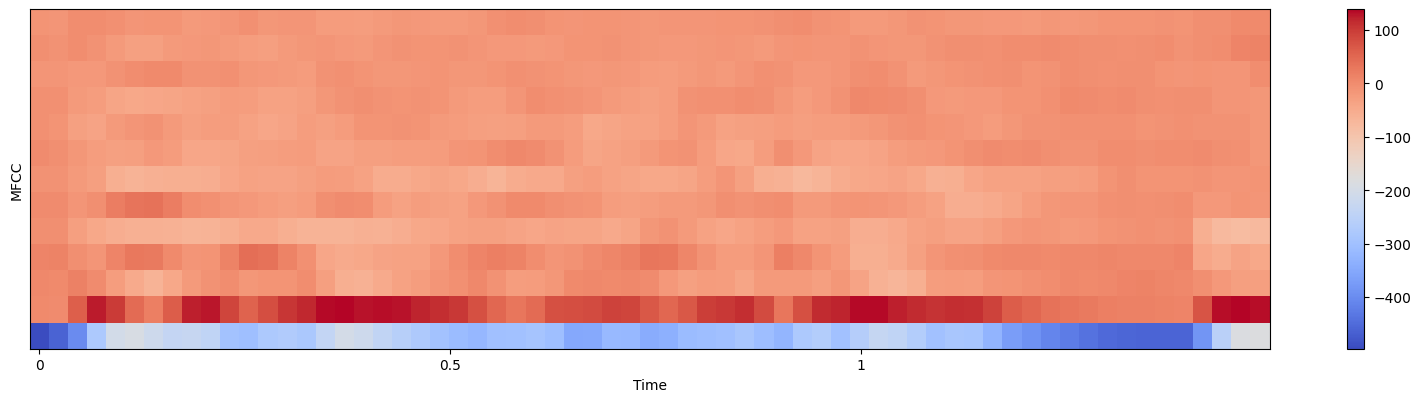

In [19]:
Xf, sample_ratef = librosa.load(data[190][0], sr=sr)
mfcc = librosa.feature.mfcc(y=Xf, sr=sample_ratef, n_mfcc=n_mfcc)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(Xf)
#librosa.display.waveplot(Xf, sr=sample_ratef)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(Xf, rate=sample_ratef)


In [21]:
mfcc.shape

(13, 65)

# 프리프로세싱

In [23]:
mask_size = int(sr * 0.2) # 0.2초
conv = torch.nn.Conv1d(1, 1, kernel_size = mask_size, bias = False)
conv.weight.data = torch.ones((1, 1, mask_size))/ mask_size
conv.requires_grad_(False)

Conv1d(1, 1, kernel_size=(2205,), stride=(1,), bias=False)

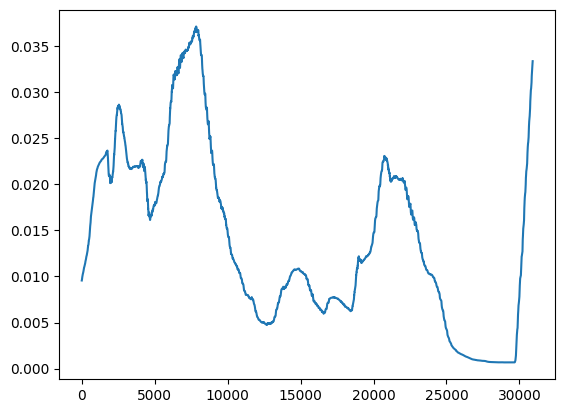

IndexError: ignored

In [26]:
x =torch.tensor(Xf).float().reshape(1,1, -1)
amp = conv(abs(x)).reshape(-1)
plt.plot(amp)
plt.show()
filtered = Xf[amp > 0.005]
plt.plot(filtered)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


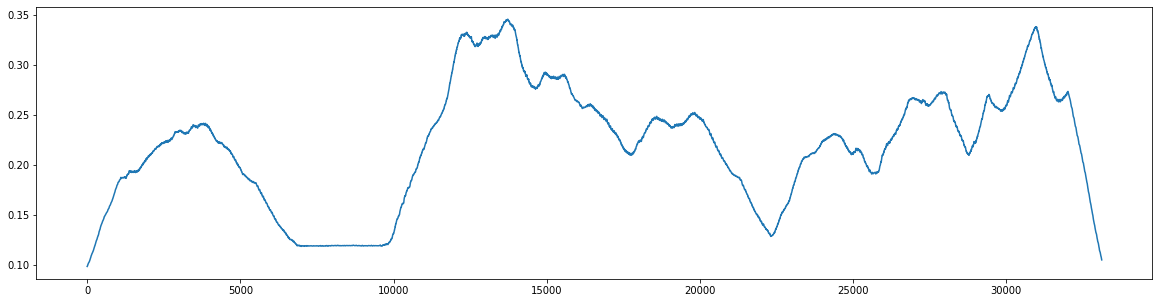

In [ ]:
mask_size = int(sr * 0.2) # 0.2초
mask = np.ones(mask_size) / mask_size
filter = mask[..., None, None]
Xf = Xf / max(Xf)
# conv = torch.nn.conv1d(abs(Xf[None, :, None]).astype(np.float), filter, stride=1, padding='SAME')
conv = conv.numpy().reshape(-1)
# conv = np.convolve(abs(Xf), mask)
plt.figure(figsize=(20, 5))
plt.plot(conv)

27343 33114


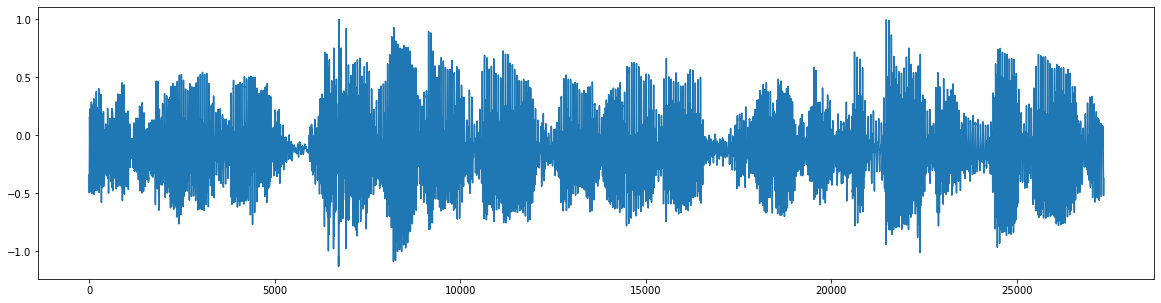

In [ ]:
filtered = Xf[conv > 0.15]
plt.figure(figsize=(20, 5))
plt.plot(filtered)
print(len(filtered), len(Xf))
ipd.Audio(filtered, rate=sr)

In [ ]:
a = np.array([1, 2, 3, 4, 5])
a[-7:]

array([1, 2, 3, 4, 5])

In [ ]:
shorten = filtered[-max_len:]
if len(shorten) < max_len:
    shorten = np.concatenate([np.zeros(max_len - len(shorten)), shorten])

ipd.Audio(shorten, rate=sr)

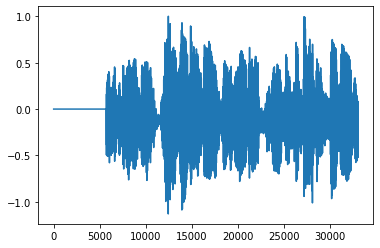

In [ ]:
plt.plot(shorten)

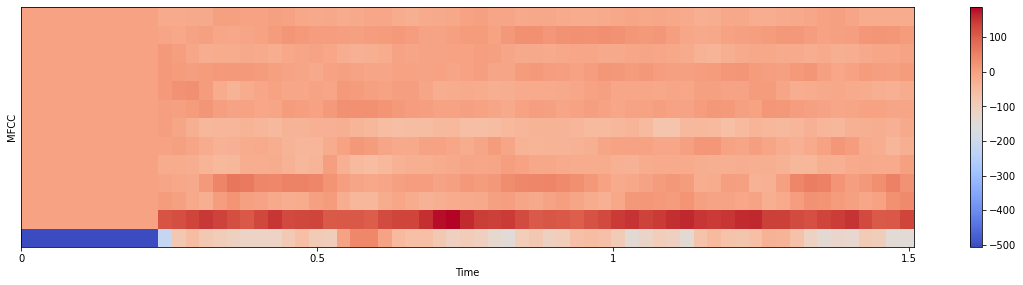

In [ ]:
mfcc = librosa.feature.mfcc(y=shorten, sr=sample_ratef, n_mfcc=n_mfcc)
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
mfcc.shape

(13, 65)

In [ ]:
data_x = []
data_y = []
count = 0

for file_path, label in data:
    Xf, sample_ratef = librosa.load(file_path,
                                res_type='kaiser_fast',sr=sr)
    Xf = Xf / max(Xf)
    conv = tf.nn.conv1d(abs(Xf[None, :, None]).astype(np.float), filter, stride=1, padding='SAME')
    conv = conv.numpy().reshape(-1)
    filtered = Xf[conv > 0.01]
    shorten = filtered[-max_len:]
    if len(shorten) < max_len:
        shorten = np.concatenate([np.zeros(max_len - len(shorten)), shorten])
    mfcc = librosa.feature.mfcc(y=shorten, sr=sample_ratef, n_mfcc=n_mfcc)
    data_x.append(mfcc)
    data_y.append(label)
    print('\r' + str(count), end='')
    count += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


399

In [ ]:
data_x = np.array(data_x)
data_y = np.array(data_y)

data_x = data_x.astype(np.float32)
data_x = data_x.transpose([0, 2, 1])

In [ ]:
data_x.shape

(400, 65, 13)

In [ ]:
data_y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

# 데이터셋 준비

In [ ]:
random_index = np.random.permutation(len(data_x))
train_x = data_x[random_index[:300]]
train_y = data_y[random_index[:300]]
valid_x = data_x[random_index[300:]]
valid_y = data_y[random_index[300:]]

dataset_train = tf.data.Dataset.from_tensor_slices((train_x, train_y))
dataset_valid = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

In [ ]:
dt = dataset_train.cache().repeat().shuffle(100).batch(batch_size).prefetch(1)
dv = dataset_valid.cache().batch(batch_size).prefetch(1)
[i[0].shape for i in dt.take(10)]

[TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13]),
 TensorShape([16, 65, 13])]

# 모델 생성 및 학습

In [ ]:
train_x.shape

(300, 65, 13)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(data_x.shape[1:]),
    keras.layers.Reshape([-1, n_mfcc, 1]),
    keras.layers.Conv2D(16, 3, padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(32, 3, padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(64, 3, padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(64, 3, padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Reshape([-1, n_mfcc * 64]),
    keras.layers.LSTM(n_mfcc * 64, return_sequences=True),
    keras.layers.LSTM(n_mfcc * 64, return_sequences=True),
    keras.layers.LSTM(n_mfcc * 64),
    keras.layers.Dense(4, activation='softmax'),
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 65, 13, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 65, 13, 16)        144       
                                                                 
 batch_normalization (BatchN  (None, 65, 13, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 65, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 13, 32)        4608      
                                                                 
 batch_normalization_1 (Batc  (None, 65, 13, 32)       128       
 hNormalization)                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
steps = (300 // batch_size)
cb_es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history = model.fit(dt, epochs=100, steps_per_epoch=steps, validation_data=dv,
                    batch_size=batch_size, callbacks=[cb_es])

Epoch 1/100
18/18 [==============================] - 10s 96ms/step - loss: 1.9683 - accuracy: 0.3681 - val_loss: 1.4170 - val_accuracy: 0.3900
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 1.4289 - accuracy: 0.3785 - val_loss: 1.4366 - val_accuracy: 0.2200
Epoch 3/100
18/18 [==============================] - 0s 23ms/step - loss: 1.0064 - accuracy: 0.5833 - val_loss: 1.0219 - val_accuracy: 0.5400
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 0.9332 - accuracy: 0.6146 - val_loss: 1.0699 - val_accuracy: 0.5500
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 0.8637 - accuracy: 0.6354 - val_loss: 1.0716 - val_accuracy: 0.5000
Epoch 6/100
18/18 [==============================] - 0s 23ms/step - loss: 0.7442 - accuracy: 0.6806 - val_loss: 0.8563 - val_accuracy: 0.6200
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 0.6885 - accuracy: 0.7500 - val_loss: 0.8387 - val_accuracy: 0.6700
Epoch

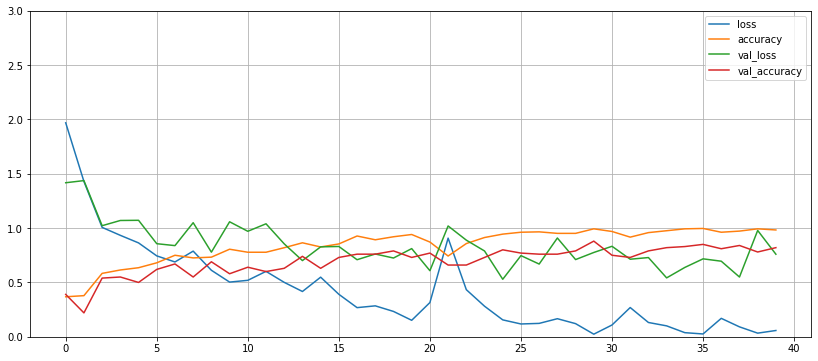

In [ ]:
pd.DataFrame(history.history).plot(figsize=(14, 6))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()

# 분석

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = valid_y
y_prob = model.predict(valid_x)
y_pred = np.argmax(y_prob, axis=1)
cm = confusion_matrix(y_true, y_pred)
cm

array([[18,  2,  0,  0],
       [ 0, 20,  6,  0],
       [ 0,  1, 21,  0],
       [ 0,  2,  7, 23]])

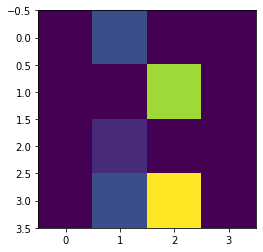

In [ ]:
s = cm.sum(axis=1)
cm = cm / s
np.fill_diagonal(cm, 0)
plt.imshow(cm)